In [6]:
# import package
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
# baca data
data = pd.read_csv('data/insurance.csv') 
data.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal)

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [7]:
x = data[['age', 'bmi', 'children']]
y = data['charges']

#membagi data latih dan data uji
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(len(x_train), len(x_test))

1070 268


c:\Users\WINDOWS 10\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


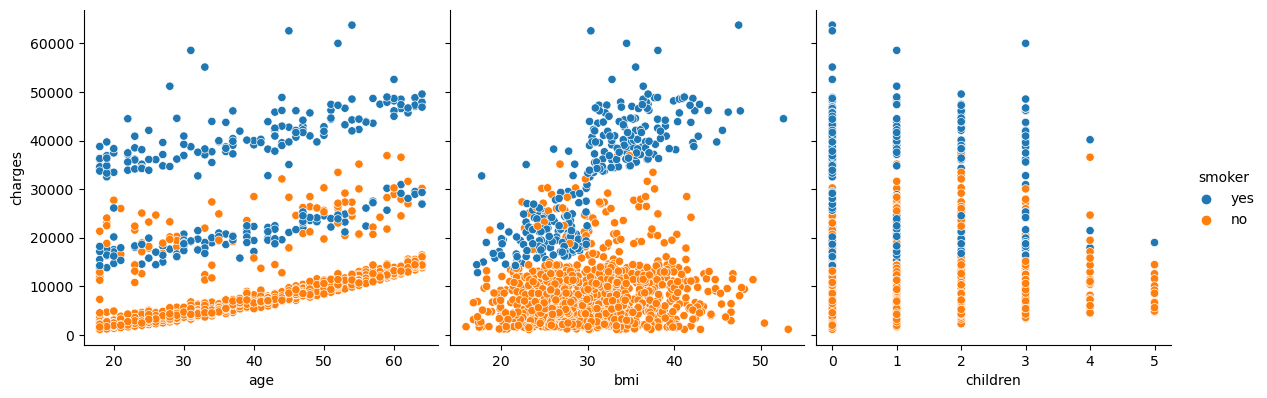

In [4]:
sns.pairplot(data, x_vars=['age', 'bmi', 'children'],
             y_vars='charges', size=4, aspect=1, kind='scatter', hue='smoker')
#digunakan untuk menampilkan hubungan antara beberapa variabel dalam satu plot 

plt.show() 

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_1476\1350261737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot = True) #digunakan untuk membuat heatmap yang menunjukkan korelasi antara variable dalam DataFrame menggunakan pustaka 'seaborn'


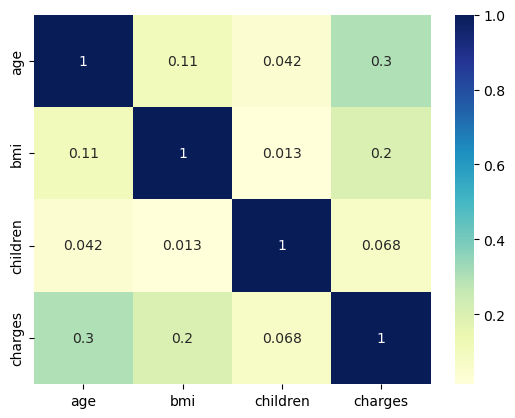

In [5]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True) #digunakan untuk membuat heatmap yang menunjukkan korelasi antara variable dalam DataFrame menggunakan pustaka 'seaborn'
plt.show() #digunakan untuk menampilkan plot

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [16]:

# membuat sebuah objek dari kelas LinearRegression()
linear_model = LinearRegression()

#menggunakan objek linear_model yang telah dibuat sebelumnya untuk melatih model regresi linear
linear_model.fit(x_train, y_train)

LinearRegression()

5. Latih model pada data latih dan lakukan prediksi pada data uji.

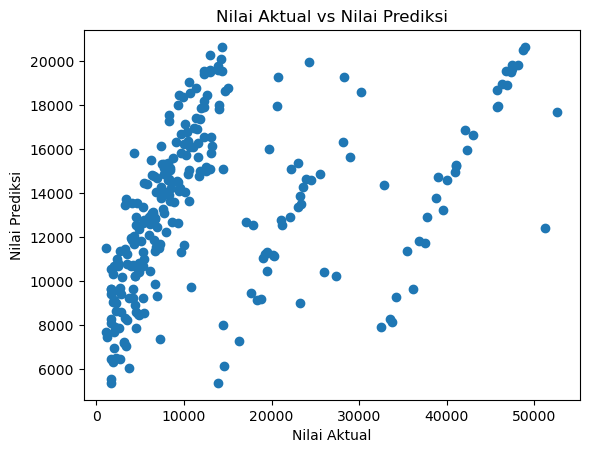

In [26]:
# melakukan prediksi pada data uji
import statsmodels.api as sm # library  untuk analisis statistik dan model statistik

# Menambahkan konstanta 
x_train_sm = sm.add_constant(x_train)

# membuat model regresi linear dengan menggunakan metode OLS
lr = sm.OLS(y_train, x_train_sm).fit()

# membuat prediksi
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)

plt.scatter(y_test, y_pred)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Nilai Aktual vs Nilai Prediksi")
plt.show()

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


MAE: 9016.00255819533
MSE: 133189853.20376825
RMSE: 11540.790839616158
R-squared: 0.16301209866339939
